In [2]:
import numpy as np
import torch

import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [3]:
cdata = torchvision.datasets.CIFAR10(root = 'cifar10', download = True)
print(cdata)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [8]:
print(cdata), print('')
print(cdata.data.shape), print(cdata.classes), print(len(cdata.targets))

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


(None, None, None)

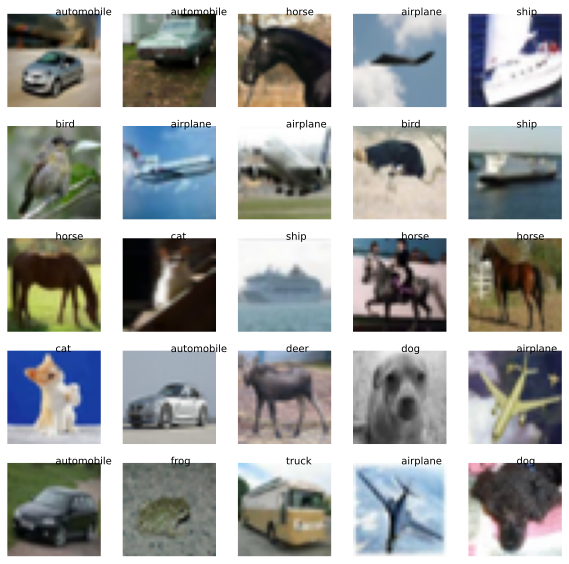

In [10]:
fig, axs = plt.subplots(5, 5, figsize = (10, 10))
for ax in axs.flatten():
  randix = np.random.choice(len(cdata.targets))
  pic = cdata.data[randix, :, :, :]
  label = cdata.classes[cdata.targets[randix]]
  
  ax.imshow(pic)
  ax.text(16, 0, label)
  ax.axis('off')

In [31]:
Ts = T.Compose([T.ToTensor(),
                T.Resize(32*4),
                T.Grayscale(num_output_channels=1)])

cdata.transform = Ts

(32, 32, 3) torch.Size([1, 128, 128]) (128, 128, 1) torch.Size([128, 128])


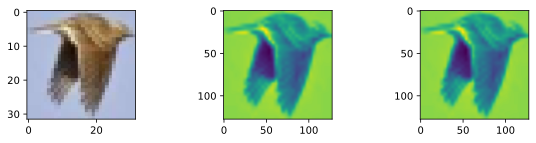

In [33]:
img1 = cdata.data[123, :, :, :]
img2 = Ts(img1)
img3 = img2.permute(1, 2, 0).numpy()
print(img1.shape, img2.shape, img3.shape, torch.squeeze(img2).shape)
fig, axs = plt.subplots(1, 3, figsize = (10, 2))
axs[0].imshow(img1)
axs[1].imshow(img3)
axs[2].imshow(torch.squeeze(img2))
plt.show()

In [34]:
T.ToTensor?